# <center>Malignant Comment Classification</center>


In [1]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
### The snippets below will help us to print the full outcome of the each code.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
%%time
train = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Malignant Comments Classifier Project/train.csv')
train = reduce_mem_usage(train)
test = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Malignant Comments Classifier Project/test.csv')
test = reduce_mem_usage(test)

Memory usage of dataframe is 9.74 MB --> 3.35 MB (Decreased by 65.6%)
Memory usage of dataframe is 2.34 MB --> 2.34 MB (Decreased by 0.0%)
CPU times: user 2.8 s, sys: 396 ms, total: 3.19 s
Wall time: 4.74 s


In [6]:
print('train shape is ',train.shape)
print('test shape is ',test.shape)
print('test info',test.info)
print('train info',train.info)

train shape is  (159571, 8)
test shape is  (153164, 2)
test info 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
print('train data Set descriptin',train.describe())
print('test data Set descriptin',test.describe())

train data Set descriptin            malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000 

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


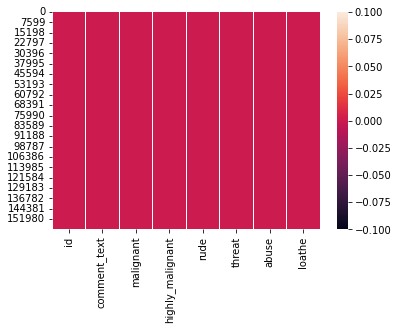

In [8]:
# checking null values
print(train.isnull().sum())
print(sns.heatmap(train.isnull()))

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


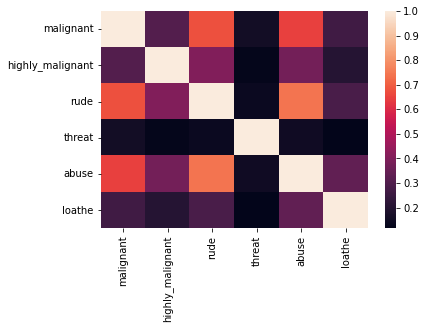

In [9]:
## checking correlation in dataset
print(train.corr())
print(sns.heatmap(train.corr()))

In [10]:
# checking the skewness for the features:
train.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


malignant


0    144277
1     15294
Name: malignant, dtype: int64


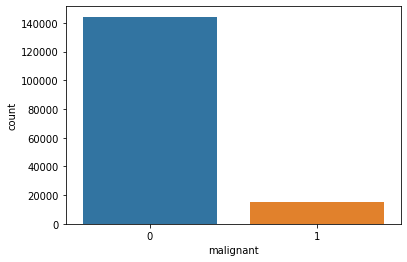

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


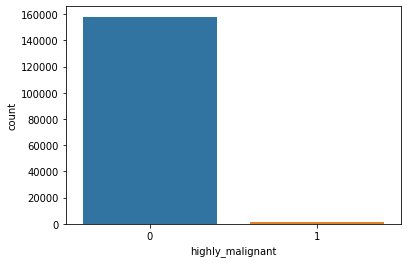

loathe


0    158166
1      1405
Name: loathe, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


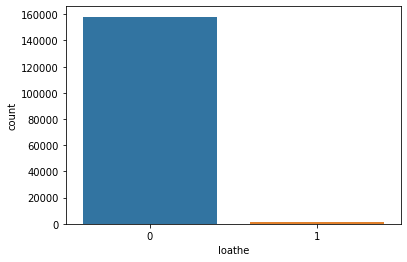

rude


0    151122
1      8449
Name: rude, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


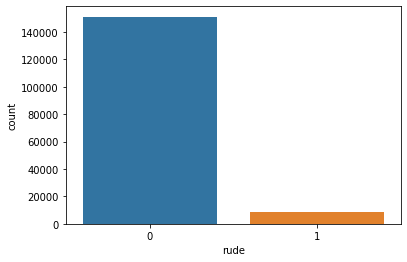

abuse


0    151694
1      7877
Name: abuse, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


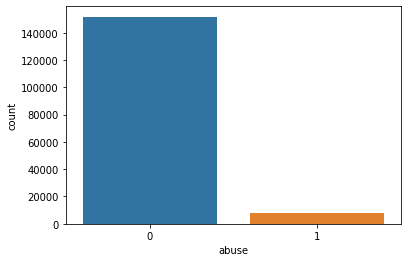

threat


0    159093
1       478
Name: threat, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


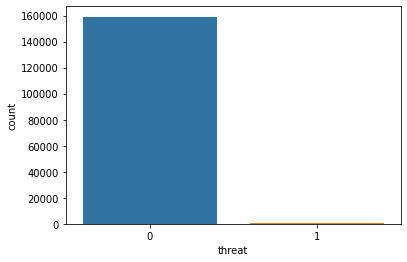

In [11]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

In [12]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [13]:
train['length'] = train['comment_text'].str.len()
train.head(2)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  
0          0                 0     0       0      0       0     264  
1          0                 0     0       0      0       0     112

In [14]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version.


In [15]:
train['clean_length'] = train.comment_text.str.len()
train.head()

id                                       comment_text  \
0  0000997932d777bf  explanation edits made username hardcore metal...   
1  000103f0d9cfb60f  d'aww! match background colour i'm seemingly s...   
2  000113f07ec002fd  hey man, i'm really trying edit war. guy const...   
3  0001b41b1c6bb37e  can't make real suggestion improvement wondere...   
4  0001d958c54c6e35    you, sir, hero. chance remember page that's on?   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  \
0          0                 0     0       0      0       0     264   
1          0                 0     0       0      0       0     112   
2          0                 0     0       0      0       0     233   
3          0                 0     0       0      0       0     622   
4          0                 0     0       0      0       0      67   

   clean_length  
0           180  
1           111  
2           149  
3           397  
4            47

In [16]:
# Total length removal
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


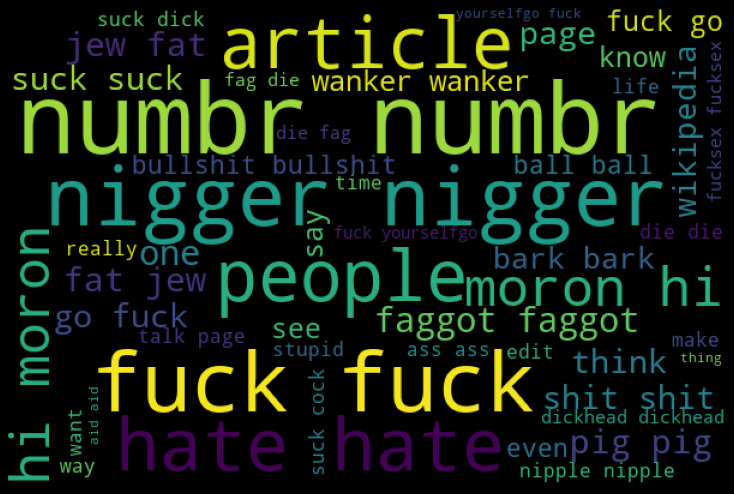

In [17]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

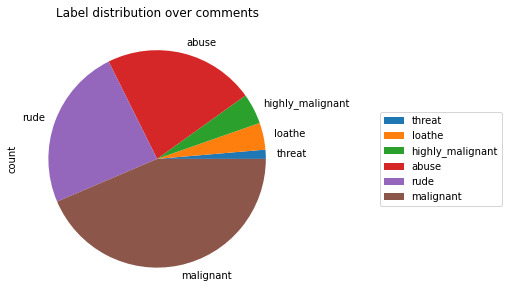

In [19]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [20]:
target_data = train[cols_target]
train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


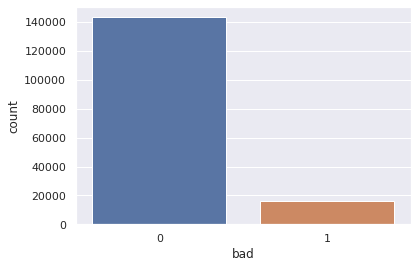

In [21]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

In [22]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [23]:
train.shape

(159571, 11)

In [24]:
test.shape

(153164, 2)

In [25]:
train.head(20)

id                                       comment_text  \
0   0000997932d777bf  explanation edits made username hardcore metal...   
1   000103f0d9cfb60f  d'aww! match background colour i'm seemingly s...   
2   000113f07ec002fd  hey man, i'm really trying edit war. guy const...   
3   0001b41b1c6bb37e  can't make real suggestion improvement wondere...   
4   0001d958c54c6e35    you, sir, hero. chance remember page that's on?   
5   00025465d4725e87         congratulation well, use tool well. · talk   
6   0002bcb3da6cb337                        cocksucker piss around work   
7   00031b1e95af7921  vandalism matt shirvington article reverted. p...   
8   00037261f536c51d  sorry word 'nonsense' offensive you. anyway, i...   
9   00040093b2687caa               alignment subject contrary dulithgow   
10  0005300084f90edc  fair use rationale image:wonju.jpg thanks uplo...   
11  00054a5e18b50dd4                 bbq man let discus it-maybe phone?   
12  0005c987bdfc9d4b  hey... it.. talk it... exclusive group wp tali...   
13  0006f16e4e9f292e  start throwing accusation warning me, let revi...   
14  00070ef96486d6f9  oh, girl started argument me. stuck nose belon...   
15  00078f8ce7eb276d  juelz santanas age numbr, juelz santana numbr ...   
16  0007e25b2121310b        bye! look, come think comming back! tosser.   
17  000897889268bc93   redirect talk:voydan pop georgiev- chernodrinski   
18  0009801bd85e5806  mitsurugi point made sense argue include hindi...   
19  0009eaea3325de8c  mean bother see writing something regarding re...   

    malignant  highly_malignant  rude  threat  abuse  loathe  length  \
0           0                 0     0       0      0       0     264   
1           0                 0     0       0      0       0     112   
2           0                 0     0       0      0       0     233   
3           0                 0     0       0      0       0     622   
4           0                 0     0       0      0       0      67   
5           0                 0     0       0      0       0      65   
6           1                 1     1       0      1       0      44   
7           0                 0     0       0      0       0     115   
8           0                 0     0       0      0       0     472   
9           0                 0     0       0      0       0      70   
10          0                 0     0       0      0       0    2875   
11          0                 0     0       0      0       0      56   
12          1                 0     0       0      0       0     319   
13          0                 0     0       0      0       0     819   
14          0                 0     0       0      0       0     219   
15          0                 0     0       0      0       0     610   
16          1                 0     0       0      0       0      57   
17          0                 0     0       0      0       0      48   
18          0                 0     0       0      0       0     118   
19          0                 0     0       0      0       0     440   

    clean_length  bad  
0            180    0  
1            111    0  
2            149    0  
3            397    0  
4             47    0  
5             42    0  
6             27    1  
7             66    0  
8            313    0  
9             36    0  
10          1938    0  
11            34    0  
12           226    1  
13           540    0  
14           125    0  
15           448    0  
16            43    1  
17            48    0  
18            87    0  
19           267    0

In [26]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [27]:
print(y.shape, x.shape)

(159571,) (159571, 10000)


In [28]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [29]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)
LG.fit(x_train, y_train)
y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595430576818056
Test accuracy is 0.9553183489304813
[[42729   221]
 [ 1918  3004]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [30]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988898736783678
Test accuracy is 0.9394009024064172
[[41585  1365]
 [ 1536  3386]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [31]:
#RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988630157834896
Test accuracy is 0.9549214572192514
[[42406   544]
 [ 1614  3308]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872



In [32]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9397845996830768
Test accuracy is 0.936559993315508
[[42846   104]
 [ 2933  1989]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     42950
           1       0.95      0.40      0.57      4922

    accuracy                           0.94     47872
   macro avg       0.94      0.70      0.77     47872
weighted avg       0.94      0.94      0.92     47872



In [33]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.951118631321677
Test accuracy is 0.9490307486631016
[[42553   397]
 [ 2043  2879]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [34]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.922300110117369
Test accuracy is 0.9173629679144385
[[42809   141]
 [ 3815  1107]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.22      0.36      4922

    accuracy                           0.92     47872
   macro avg       0.90      0.61      0.66     47872
weighted avg       0.91      0.92      0.89     47872



In [35]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988719684151156
Test accuracy is 0.9553601270053476
[[42403   547]
 [ 1590  3332]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.68      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



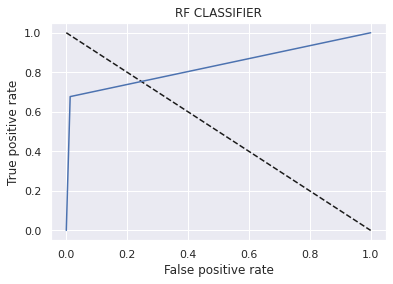

In [37]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [39]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [40]:
prediction=RF.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
import joblib
joblib.dump(RF,"malig.pkl")

['malig.pkl']